In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, "../func_py/")
import data_utils as ut
import plot_utils as pl_ut

In [2]:
pat = 1
metadata = pd.read_csv('metadata/metadata.tsv', sep='\t', index_col=0)

### Global family size distribution

In [4]:
def get_cum_counts(counts):
    uni_count, count_count = np.unique(counts, return_counts=True)
    uni_count_s = uni_count[np.argsort(uni_count)[::-1]]
    count_count_s = count_count[np.argsort(uni_count)[::-1]]
    return uni_count_s[::-1], np.cumsum(count_count_s)[::-1]

In [7]:
counts = fh.groupby('family').agg({'count' : sum})['count']
uni_count_h, cumcount_h = get_cum_counts(counts)
counts = fp.groupby('family').agg({'count' : sum})['count']
uni_count_p, cumcount_p = get_cum_counts(counts)

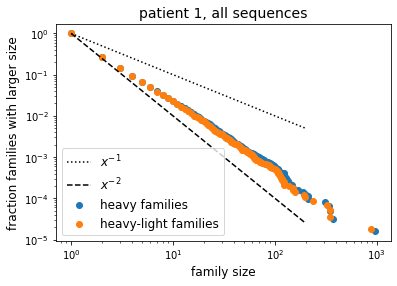

In [9]:
plt.loglog()
plt.title('patient ' +str(pat)+ ', all sequences', fontsize=14)
plt.xlabel('family size', fontsize=12)
plt.ylabel('fraction families with larger size', fontsize=12)
plt.scatter(uni_count_h, cumcount_h / cumcount_h[0], label='heavy families')
plt.scatter(uni_count_p, cumcount_p / cumcount_p[0], label='heavy-light families')
xs = np.linspace(1,200,20)
plt.plot(xs, xs**(-1), c='k', ls=':', label=r'$x^{-1}$')
plt.plot(xs, xs**(-2), c='k', ls='--', label=r'$x^{-2}$')
plt.legend(fontsize=12)

#plt.savefig('plots/families/pat'+str(pat)+'_all_seq_size_dist.png', dpi=200, facecolor='w')

### Sample family size distribution

In [10]:
fam_type = 'familiy_pairs'
uni_counts, cumcounts, samples = [], [], []
for samp in metadata[metadata.patient == pat].index:
    f = pd.read_csv('sequences/'+samp+'.tsv', sep='\t', index_col=0, low_memory=False)
    f = f[f.chain == 'H']
    f = f[f[fam_type].notna()]
    counts = f.groupby(fam_type).agg({'pair_count' : sum})['pair_count']
    uni_count, count_cumcount = get_cum_counts(counts)
    uni_counts.append(uni_count)
    cumcounts.append(count_cumcount)
    samples.append(samp)

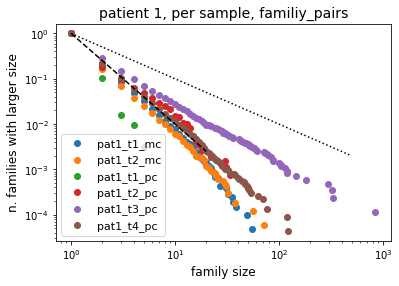

In [11]:
plt.loglog()
plt.title('patient ' +str(pat)+ ', per sample, ' + fam_type, fontsize=14)
plt.xlabel('family size', fontsize=12)
plt.ylabel('n. families with larger size', fontsize=12)
for i, (uni_count, cumcount) in enumerate(zip(uni_counts, cumcounts)):
    plt.scatter(uni_count, cumcount/cumcount[0], label=samples[i])
    
xs = np.linspace(1,500,20)
plt.plot(xs, xs**(-1), c='k', ls=':')
xs = np.linspace(1,20,20)
plt.plot(xs, xs**(-2), c='k', ls='--')
plt.legend(fontsize=11)

#plt.savefig('plots/families/pat'+str(pat)+'_samples_size_dist_'+fam_type+'.png', dpi=200, facecolor='w')

## Common families between scatter

### Between time samples

In [12]:
s1, s2 = 'pat1_t2_mc', 'pat1_t4_pc'
fam_type = 'familiy_pairs'

f1 = ut.read_family_frame(s1, fam_type=fam_type)
f2 = ut.read_family_frame(s2, fam_type=fam_type)
f1_aux = f1.groupby(fam_type).agg({'pair_count':sum})
f2_aux = f2.groupby(fam_type).agg({'pair_count':sum})
merged_counts = pd.merge(f1_aux, f2_aux, on=fam_type, how='outer').fillna(0)
sparse_counts = ut.build_sparse_counts([merged_counts['pair_count_x'], merged_counts['pair_count_y']])

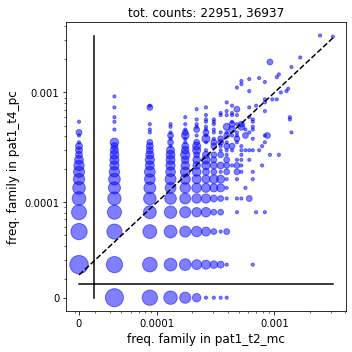

In [14]:
fig, ax = plt.subplots(figsize=(5,5))

ax = pl_ut.plot_scatter(ax, sparse_counts, s1, s2, 10, 400, False)
plt.tight_layout()
#plt.savefig('plots/freq_scatter/'+fam_type+'_s('+s1+','+s2+').png', dpi=200, facecolor='w')

### Between replicates

In [16]:
s = 'pat2_t1_mc'
r1, r2 = '1', '2'
fam_type = 'familiy_pairs'

f1 = ut.read_family_frame(s+'_r'+r1, True, fam_type=fam_type)
f2 = ut.read_family_frame(s+'_r'+r2, True, fam_type=fam_type)
f1_aux = f1.groupby(fam_type).agg({'pair_count':sum})
f2_aux = f2.groupby(fam_type).agg({'pair_count':sum})
merged_counts = pd.merge(f1_aux, f2_aux, on=fam_type, how='outer').fillna(0)
sparse_counts = ut.build_sparse_counts([merged_counts['pair_count_x'], merged_counts['pair_count_y']])

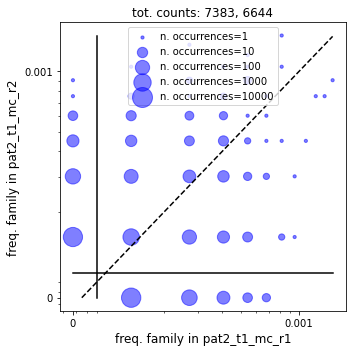

In [17]:
fig, ax = plt.subplots(figsize=(5,5))

ax = pl_ut.plot_scatter(ax, sparse_counts, s+'_r'+r1, s+'_r'+r2, 10, 400, True)
plt.tight_layout()
#plt.savefig('plots/freq_scatter/'+fam_type+'_'+s+'_r('+r1+'-'+r2+').png', dpi=200, facecolor='w')

### Between time samples, undersampled

In [18]:
s1, s2 = 'pat2_t2_mc', 'pat2_t3_mc'
n1, n2 = 6000, 10000
fam_type = 'familiy_pairs'

f1 = ut.read_family_frame(s1, fam_type=fam_type)
f2 = ut.read_family_frame(s2, fam_type=fam_type)
f1 = ut.downsample_frame(f1, n1)
f2 = ut.downsample_frame(f2, n2)
f1_aux = f1.groupby(fam_type).agg({'pair_count':sum})
f2_aux = f2.groupby(fam_type).agg({'pair_count':sum})
merged_counts = pd.merge(f1_aux, f2_aux, on=fam_type, how='outer').fillna(0)
sparse_counts = ut.build_sparse_counts([merged_counts['pair_count_x'], merged_counts['pair_count_y']])

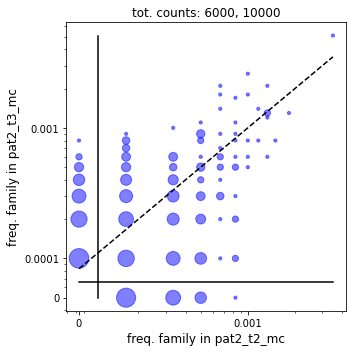

In [19]:
fig, ax = plt.subplots(figsize=(5,5))

ax = pl_ut.plot_scatter(ax, sparse_counts, s1, s2, 10, 400, False)
plt.tight_layout()
#plt.savefig('plots/freq_scatter/'+fam_type+'_downsamp_s('+s1+','+s2+').png', dpi=200, facecolor='w')

### Correlation between delta log counts of plasmablasts and memory

In [20]:
sm1, sm2 = 'pat2_t2_mc', 'pat2_t3_mc'
sp1, sp2 = 'pat2_t2_pc', 'pat2_t3_pc'
fam_type = 'familiy_pairs'

fm1 = ut.read_family_frame(sm1, fam_type=fam_type)
fm2 = ut.read_family_frame(sm2, fam_type=fam_type)
fp1 = ut.read_family_frame(sp1, fam_type=fam_type)
fp2 = ut.read_family_frame(sp2, fam_type=fam_type)

In [21]:
fam_m1 = fm1.groupby(fam_type).agg({'pair_count' : sum})
fam_m2 = fm2.groupby(fam_type).agg({'pair_count' : sum})
merged_fr_m = fam_m1.merge(fam_m2, how='outer', on=fam_type)
merged_fr_m[merged_fr_m.isna()] = 0
merged_fr_m.index = np.array(merged_fr_m.index, dtype=int)

fam_p1 = fp1.groupby(fam_type).agg({'pair_count' : sum})
fam_p2 = fp2.groupby(fam_type).agg({'pair_count' : sum})
merged_fr_p = fam_p1.merge(fam_p2, how='outer', on=fam_type)
merged_fr_p[merged_fr_p.isna()] = 0
merged_fr_p.index = np.array(merged_fr_p.index, dtype=int)

no_zero_fams = set(merged_fr_m.index).intersection(set(merged_fr_p.index))
len(no_zero_fams)
merged_fr_m = merged_fr_m.loc[np.isin(merged_fr_m.index.values, list(no_zero_fams))]
merged_fr_p = merged_fr_p.loc[np.isin(merged_fr_p.index.values, list(no_zero_fams))]
mm, mp = merged_fr_m == 0, merged_fr_p == 0
merged_fr_m[mm] = 0.5
merged_fr_p[mp] = 0.5
merged_fr_m['log delta'] = np.log(merged_fr_m['pair_count_x']) - np.log(merged_fr_m['pair_count_y'])
merged_fr_p['log delta'] = np.log(merged_fr_p['pair_count_x']) - np.log(merged_fr_p['pair_count_y'])

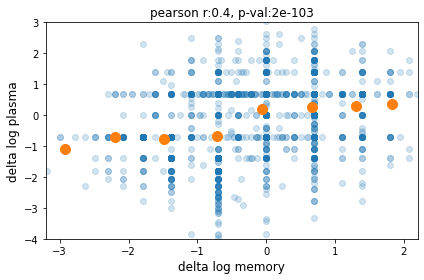

In [22]:
from scipy.stats import pearsonr, spearmanr

xs, ys = merged_fr_m['log delta'].values, merged_fr_p['log delta'].values
plt.scatter(xs, ys, alpha=0.2)
r, pval = pearsonr(xs, ys)
plt.title('pearson r:%.g, p-val:%.g'%(r, pval))

bins = np.linspace(min(xs), max(xs), 9)
sort_ids = np.argsort(xs)
xs = xs[sort_ids]
ys = ys[sort_ids]
xs_av = [np.mean(xs[np.logical_and(xs >= bins[i], xs < bins[i+1])]) for i in range(len(bins)-1)]
ys_av = [np.mean(ys[np.logical_and(xs >= bins[i], xs < bins[i+1])]) for i in range(len(bins)-1)]
plt.scatter(xs_av, ys_av, s=100)

plt.xlim(-3.2, 2.2)
plt.ylim(-4, 3)
plt.xlabel('delta log memory', fontsize=12)
plt.ylabel('delta log plasma', fontsize=12)

plt.tight_layout()
#plt.savefig('plots/corr_delta_logs.png', dpi=200)